In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import math
import numpy as np

In [284]:
def truncate(number, decimals=0):
    """
    Returns a value truncated to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer.")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more.")
    elif decimals == 0:
        return math.trunc(number)

    factor = 10.0 ** decimals
    return math.trunc(number * factor) / factor

In [170]:
qa_1 = "data/log_02_03_2021__20_59_20/params_qa1000_cf893c92-6a95-4646-a75b-5bac83ab2154.json"
qa_2 = "data/log_02_03_2021__21_00_14/params_qa1000_61a0b009-9b25-4341-9bbd-729e18984757.json"
qa_3 = "data/log_02_03_2021__21_01_08/params_qa1000_398e6290-4bdc-4c2e-b80e-073ca798eebe.json"

In [183]:
sa_1 = "data/log_02_03_2021__20_59_20/params_sa_1_-17.0_1000.json"
sa_2 = "data/log_02_03_2021__21_00_14/params_sa_1_-17.0_1000.json"
sa_3 = "data/log_02_03_2021__21_01_08/params_sa_1_-17.0_1000.json"

In [184]:
with open(qa_1,"r") as f:
  data = f.read()
qa_1_json = json.loads(data)
with open(qa_2,"r") as f:
  data = f.read()
qa_2_json = json.loads(data)
with open(qa_3,"r") as f:
  data = f.read()
qa_3_json = json.loads(data)

In [185]:
with open(sa_1,"r") as f:
  data = f.read()
sa_1_json = json.loads(data)
with open(sa_2,"r") as f:
  data = f.read()
sa_2_json = json.loads(data)
with open(sa_3,"r") as f:
  data = f.read()
sa_3_json = json.loads(data)

In [186]:
t_q_1 = qa_1_json['result_data']['info']['timing']['qpu_sampling_time']/1000000
t_q_2 = qa_2_json['result_data']['info']['timing']['qpu_sampling_time']/1000000
t_q_3 = qa_3_json['result_data']['info']['timing']['qpu_sampling_time']/1000000

<Figure size 432x288 with 0 Axes>

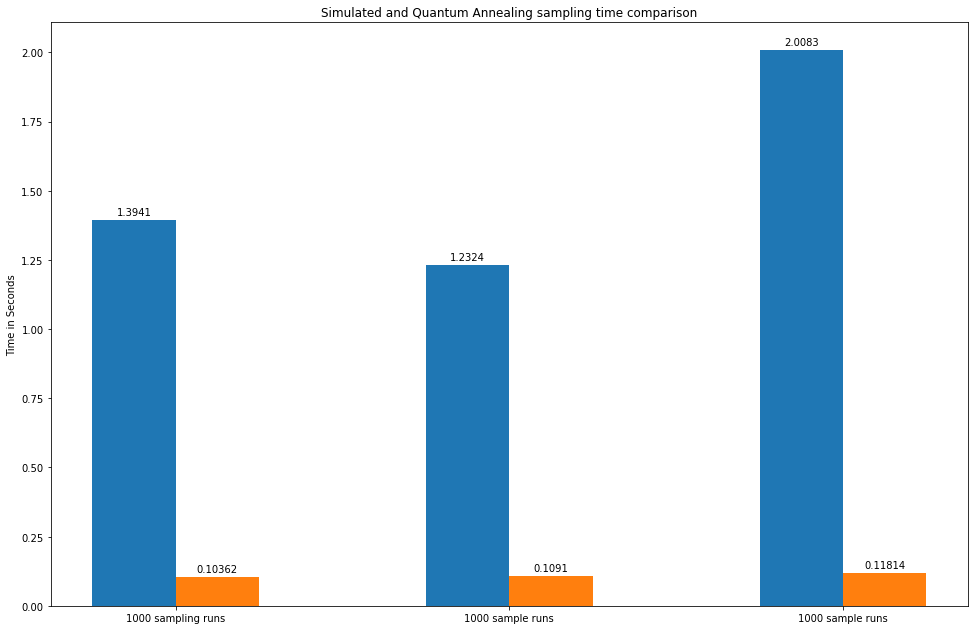

In [187]:
t1 = np.array([1000, 3000, 5000])
t2 = np.array([truncate(sa_1_json['annealing_time'],4), truncate(sa_2_json['annealing_time'],4), truncate(sa_3_json['annealing_time'],4)])
t3 = np.array([t_q_1, t_q_2, t_q_3])

plt.figure(1)
fig, ax = plt.subplots()
rects1 = ax.bar(t1-250, t2, width=500, label='Simualted Annealing')
rects2 = ax.bar(t1+250, t3, width=500, label='Quantum Annealing')
plt.xticks(t1, ('1000 sampling runs', '1000 sample runs', '1000 sample runs'))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time in Seconds')
ax.set_title('Simulated and Quantum Annealing sampling time comparison')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

        
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(15)

plt.savefig('data/plots/time_comparison.png')
plt.show()

In [228]:
qa_df_1 = pd.read_csv('data/log_02_03_2021__20_59_20/annealing_runcf893c92-6a95-4646-a75b-5bac83ab2154.csv', index_col=0)
qa_df_2 = pd.read_csv('data/log_02_03_2021__21_00_14/annealing_run61a0b009-9b25-4341-9bbd-729e18984757.csv', index_col=0)
qa_df_3 = pd.read_csv('data/log_02_03_2021__21_01_08/annealing_run398e6290-4bdc-4c2e-b80e-073ca798eebe.csv', index_col=0)

In [272]:
sa_df_1 = pd.read_csv('data/log_02_03_2021__20_59_20/simulated_annealing_1.3941059629942174.csv', index_col=0)
sa_df_2 = pd.read_csv('data/log_02_03_2021__21_00_14/simulated_annealing_1.2324078120000195.csv', index_col=0)
sa_df_3 = pd.read_csv('data/log_02_03_2021__21_01_08/simulated_annealing_2.0083507519957493.csv', index_col=0)
            

In [273]:
from quantum_annealing_sudoku import quantum_annealing_sudoku
from quantum_annealing_sudoku.label_encoder import encode_var_labels, decode_var_labels

In [274]:
sudoku_4x4 = quantum_annealing_sudoku.QuantumAnnealingSudoku(grid_9x9 = False)


#get some function shortcuts for better readability 
check_sudoku = sudoku_4x4.check_sudoku
encode_board_to_binary = sudoku_4x4.encode_board_to_binary
decode_board_from_binary = sudoku_4x4.decode_board_from_binary
print_board = sudoku_4x4.print_board

In [275]:
def calculate_qa_success_probability(qa_df):
    solution = {}
    invalid_solutions = 0 
    for row_num in range(len(qa_df)):
        for column in qa_df.columns[:64]:
            solution[column] = qa_df.iloc[row_num][column]


        binary_solution_board= np.zeros((4, 4, 4))
        for index, value in solution.items():
            index = int(index)
            if index is not None and int(index)>0:
                board_index = decode_var_labels(index)
                binary_solution_board[board_index[2]-1][board_index[0]-1][board_index[1]-1] = value

        #solution_board=decode_board_from_binary(binary_solution_board)
        #print_board(solution_board)
        error_count = check_sudoku(solution_board)
        if error_count>0:
            invalid_solutions+=1
    
    success_probability = (1-invalid_solutions)/len(qa_df)
    
    return success_probability
        
        

In [276]:
success_prob_qa_1 = calculate_qa_success_probability(qa_df_1)
success_prob_qa_2 = calculate_qa_success_probability(qa_df_2)
success_prob_qa_3 = calculate_qa_success_probability(qa_df_3)

In [278]:
success_prob_sa_1 = calculate_qa_success_probability(sa_df_1)
success_prob_sa_2 = calculate_qa_success_probability(sa_df_2)
success_prob_sa_3 = calculate_qa_success_probability(sa_df_3)

<Figure size 432x288 with 0 Axes>

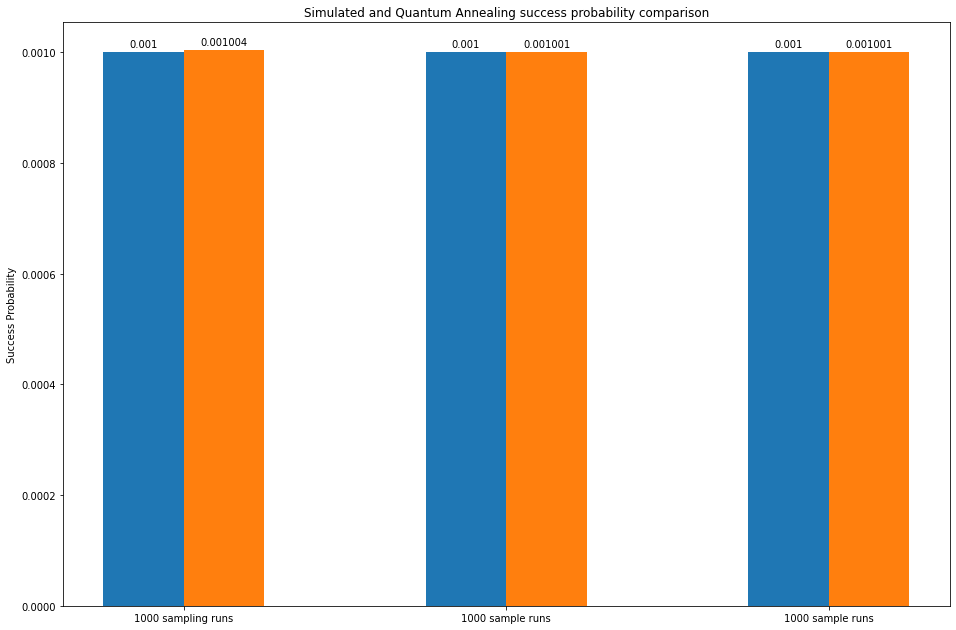

In [288]:
t1 = np.array([1000, 3000, 5000])
t2 = np.array([truncate(success_prob_sa_1,6), truncate(success_prob_sa_2,6), truncate(success_prob_sa_3,6)])
t3 = np.array([truncate(success_prob_qa_1,6), truncate(success_prob_qa_2,6), truncate(success_prob_qa_3,6)])

plt.figure(1)
fig, ax = plt.subplots()
rects1 = ax.bar(t1-250, t2, width=500, label='Simualted Annealing')
rects2 = ax.bar(t1+250, t3, width=500, label='Quantum Annealing')
plt.xticks(t1, ('1000 sampling runs', '1000 sample runs', '1000 sample runs'))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Success Probability')
ax.set_title('Simulated and Quantum Annealing success probability comparison')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

        
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(15)

plt.savefig('data/plots/success_probability_comparison.png')
plt.show()